# Illustrating simple linear classification of digits with logistic regression

This notebook illustrates a linear classifer for classifying grayscale images of handwritten digits. The classifier that we use is a logistic regression model provided by [Scikit-learn](http://scikit-learn.org/stable/) that computes the log-odds of the linear combination of gray scale pixels  in the image. To train and test the model, we use the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. 

The MNIST datasets contains over 50,000 28-by-28 pixel gray scale images of the digits 0 through 9 (so we have 10 classes total). The way each image is represented is as a 2D array (a matrix) with 28 rows and 28 columns where each element has a integer value betweeen 0 and 255. Logistic regression, like most machine learning algorithms (but not all, such as Convolutional Neural Networs), expects each input data point to be represented as a vector (as opposed to a matrix). [Kaggle](https://www.kaggle.com/c/digit-recognizer) has prepapred the images in MNIST so that they are vectors. This was done by simply reshaping each image from a 28-by-28 2D array to a 784 (= 28*28) length 1D array and formatted as CSV file.

In the end, the dataset that we download from Kaggle is a CSV file with 785 coluns where the first column is the label of the digit and the remianing 784 columns correspond to the pixel values of the image. The model then tries to predict what the label should be based only on the pixel values. 

In this example notebook we will only look at classifying two digits. That is, we will take a subset of the images that correspond to 2 of the digits and discard the rest of the data.

## Load data

The [pandas](http://pandas.pydata.org/index.html) library provides a number of convinience methods for loadings data files (such as CSV) and manipulating data tables. It is the preferred library for loading and manipulating data sets that fit in memory. We also load [numpy](http://www.numpy.org) that provides python interfaces for C and Fortran based linear algebra libraries. 

In [1]:
import pandas as pd
import numpy as np

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [2]:
# load the data
df = pd.read_csv("train.csv")

# take a sneak peak of the data to  see if it makes sense 
# e.g. is the first column the label column as expected?
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# create a numpy array for just the labels and a numpy array for the pixel values
labels = np.array(df.iloc[:,0])
imgs_wrapped = np.array(df.iloc[:,1:])

In [4]:
# setup label 0
y_0 = labels[labels == 0]
X_0 = imgs_wrapped[labels == 0, :]


# setup label 1
y_1 = labels[labels == 1]
X_1 = imgs_wrapped[labels == 1, :]

## Visualize sample images

Matplotlib is the visualization library that we use. Since the images have been transformed to 1D arrays, we need to reshape them to 28-by-28 2D arrays so we can actually look at them.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

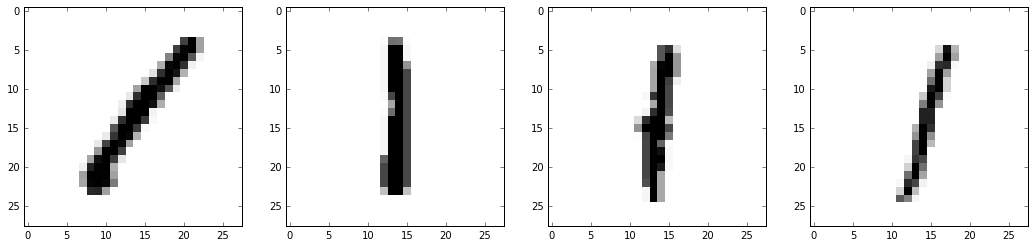

In [6]:
plt.figure(figsize=(18, 8))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_1[i,:].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

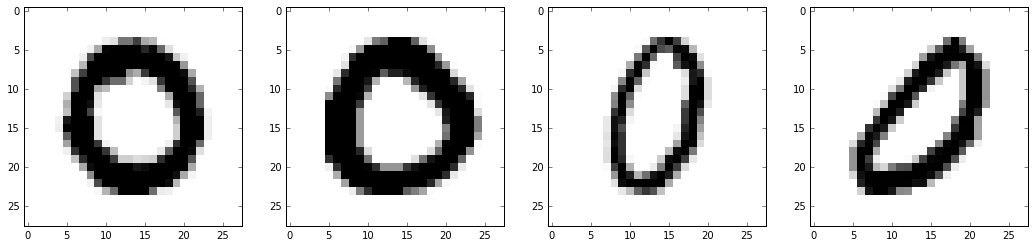

In [7]:
plt.figure(figsize=(18, 8))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_0[i,:].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

## Preparing training and test sets 

In [8]:
x_unshuffled = np.vstack((X_0, X_1))
y_unshuffled = np.vstack((y_0[np.newaxis].T, y_1[np.newaxis].T))

The data here is not shuffled in a random order (all images corresponding to one class come first followed by the other). We shuffled the data so that is in random order. For batch-based learning algorithms, this is not important, but for stochastic gradient descent algorithms this is can have significant impact on convergence. We use the convinience "shuffle" method provided by [Scikit-learn](http://scikit-learn.org/stable/). 

In [9]:
from sklearn.utils import shuffle

In [10]:
X, y  = shuffle(x_unshuffled, y_unshuffled, random_state = 216) # use a random seed for reproducibility
print "Number of  images is", X.shape[0]

Number of  images is 8816


In [11]:
# use 70% of the data for training
N = int(.7*X.shape[0])
X_train = X[:N,:]
X_test = X[N:,:]
y_train = y[:N,:]
y_test = y[N:,:]

## Train and test the model

In [12]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression() # we just use the default parameters here

In [13]:
LR.fit(X_train, y_train.squeeze())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
LR.score(X_train, y_train)

1.0

In [15]:
LR.score(X_test, y_test)

0.99962192816635165

## Analyze the coefficients of the model

The parameters of the model are the weights learned for the coefficients for each pixel value and the intercept term.

In [16]:
## The intercept term:
LR.intercept_

array([  4.83912008e-05])

In [17]:
## We should have 784 coefficients for each pixel in the image
LR.coef_.shape

(1, 784)

We can visualize the coefficients for the pixels as an image - this might make it easier to understand what the model has learned:

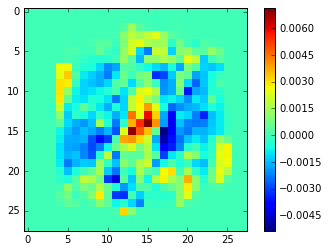

In [18]:
plt.imshow(LR.coef_.reshape(28,28), interpolation='nearest')
plt.colorbar()

The negative weights correspond to the negative class whereas the positive weights correspond to the positive class. To untagle the positive vs negative weights, lets visualize them. First lets see which class corresponds to positive and which to negative:

In [19]:
LR.classes_

array([0, 1])

So the 0 digits correspond to the negative class and the 1 digits correspond to positive class. Now let's visualize the weights!

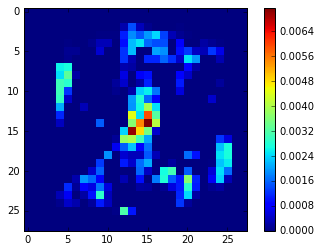

In [20]:
## The weights corresponding to the positive class
pos_coeff = np.empty_like(LR.coef_)
pos_coeff[:] = LR.coef_
pos_coeff[pos_coeff < 0] = 0
plt.imshow(pos_coeff.reshape(28,28), interpolation='nearest')
plt.colorbar()

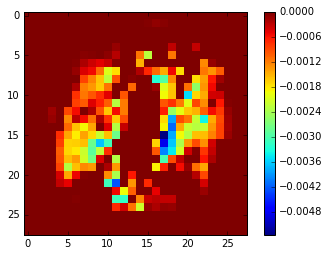

In [21]:
## The weights corresponding to the negative class
neg_coeff = np.empty_like(LR.coef_)
neg_coeff[:] = LR.coef_
neg_coeff[neg_coeff>0]= 0
plt.imshow(neg_coeff.reshape(28,28), interpolation='nearest')
plt.colorbar()